# The Perceptron

This notebook implements the Perceptron, which is a single neural model. The Perceptron is a supervised learning algorithm for binary classification.

---

First, load the relevant libraries needed.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

### The Data

To apply the Perceptron, the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset will be used. This dataset is good for the classification task because it contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

Using wing length and tail length, I am interested in using these two variables to determine a hawk's species. The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [2]:
# Read in the data and subset it to the relevant columns/observations
df = pd.read_csv("Data/hawks.csv")
df = df[["Species", "Wing", "Tail"]].dropna(axis=0)
df

,Species,Wing,Tail
0,RT,385.0,219
1,RT,376.0,221
2,RT,381.0,235
3,CH,265.0,220
4,SS,205.0,157
...,...,...,...
903,RT,380.0,224
904,SS,190.0,150
905,RT,360.0,211
906,RT,369.0,207


After the processing of this data, there are 907 observations to work with. Wing length and tail length are both continuous numerical variables, while Species is a variable consisting of 3 categories:

1. `RT`: Red-tailed
2. `CH`: Cooper's
3. `SS`: Sharp-Shinned

Now, let's plot the data.

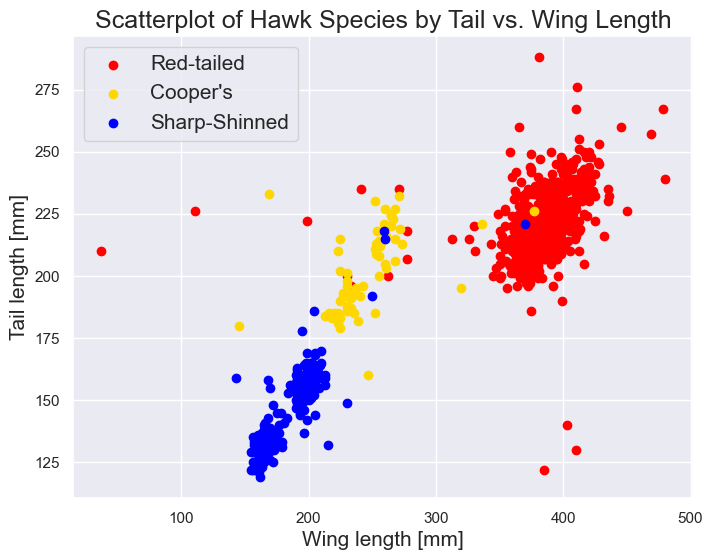

In [3]:
# Produce a scatterplot of tail vs. wing length, color-coded by hawk species
RT = df[df.Species == "RT"]
CH = df[df.Species == "CH"]
SS = df[df.Species == "SS"]

plt.figure(figsize = (8, 6))
plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

There is a clear clustering for each of the species based on their wing and tail lengths, so classification is a viable goal. Because the Perceptron is meant for binary classification, I combine the Cooper's and Sharp-shinned hawks into one group. The classification task will then be to identify if a hawk is Red-tailed or not Red-tailed, given it's wing length and tail length.

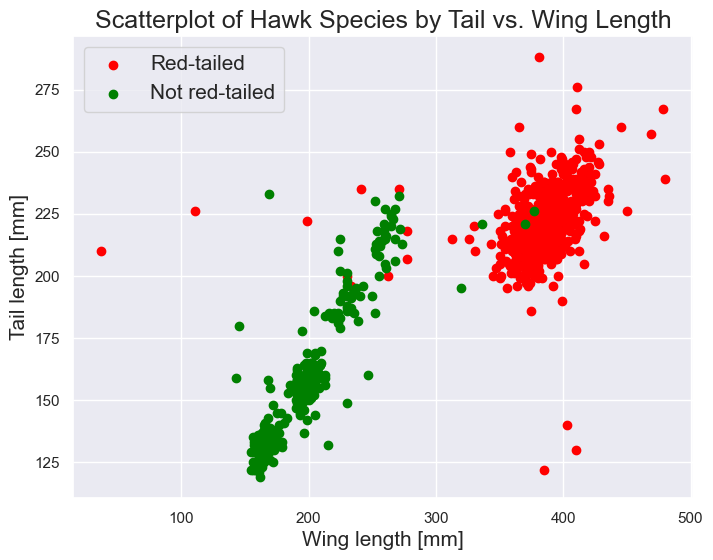

In [4]:
# Produce a scatterplot of tail vs. wing length, color-coded by hawk species
NRT = df[df.Species != "RT"]

plt.figure(figsize = (8, 6))
plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(NRT.Wing, NRT.Tail, color = "green", label = "Not red-tailed")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

The previous plot displaying all 3 species already had observations that were "outliers", as there are some observations where their measurements suggest that that hawk should be another species instead. This plot of binary categories further emphasizes that the boundary for each of the clusters is not clearly demarcated thanks to some observations deviating from the bulk of the cluster. This may lower the accuracy of the perception algorithm, which will finally be trained in the next section.

### Training the model

In [5]:
# Store the desired species values in the numpy array y
y = df.Species.values
#y = df.iloc[0:100].Species.values

# Convert each entry of y with RT (red-tailed) to -1 and otherwise 1
y = np.where(y == 'RT', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["Wing", "Tail"]].values
#X = df[["Wing", "Tail"]].iloc[:100].values

In [6]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [7]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 10_000) # takes approximately 2 minutes with 10,000 epochs!

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [8]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
#print(y == y_hat)

print(sum(y == y_hat) / len(y))

0.639470782800441


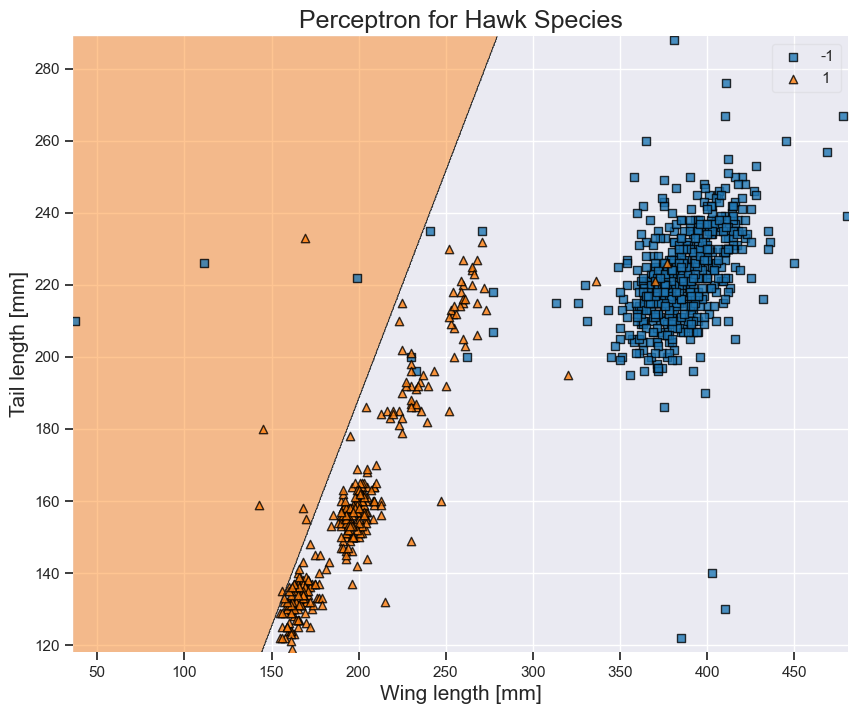

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("Perceptron for Hawk Species", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.show()

### Misclassifications Plot

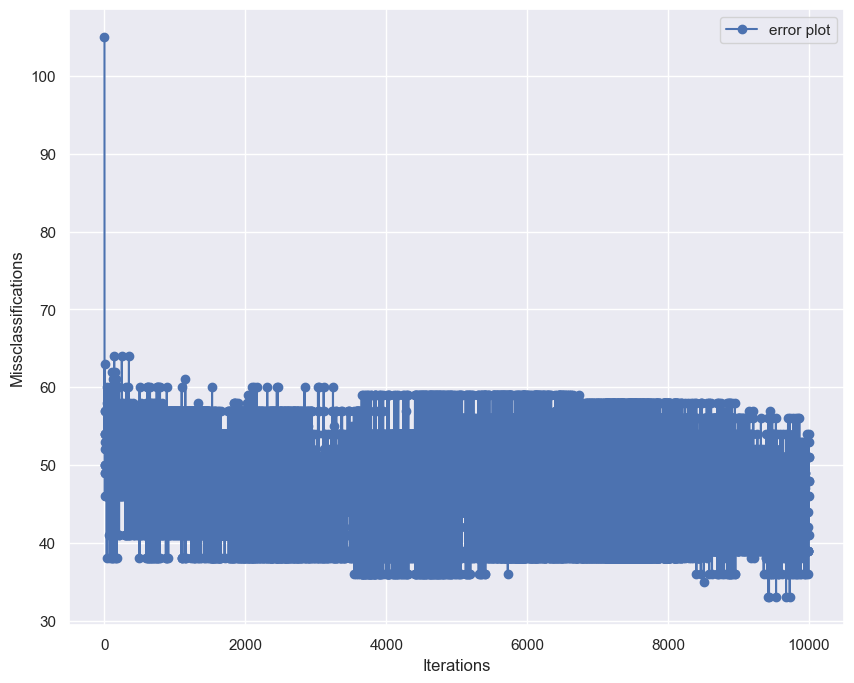

In [10]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()